# Analyze the activities weak and total

- No need to save figures anymore...Directly working on the slides!


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import copy
import scipy.sparse as sp
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression

# regression tools
import statsmodels.api as sm
from sklearn.preprocessing import normalize

In [3]:
import seaborn as sns

In [4]:
import sys
sys.path.append("../")
import utils

In [5]:
# read files
with open("../../data/02_intermediate/boston_stays.pickle", 'rb') as f:
    df_boston = pickle.load(f)

with open("../../data/02_intermediate/miami_stays.pickle", 'rb') as f:
    df_miami = pickle.load(f)

with open("../../data/02_intermediate/chicago_stays.pickle", 'rb') as f:
    df_chicago = pickle.load(f)

with open("../../data/02_intermediate/nyc_stays.pickle", 'rb') as f:
    df_nyc = pickle.load(f)


In [6]:
# sociodemo
with open("../../data/02_intermediate/socioecon_boston_miami_chicago_nyc_ct_shp_dic.pickle", 'rb') as f:
    socioecon_shp_dic = pickle.load(f)
    

In [7]:
# read evaluation files
with open("../../data/05_model_outputs/lasso_coefficients.pickle", 'rb') as f:
    lasso_coef = pickle.load(f)
    

In [8]:
# locations
fig_location = '../../../economic-strength-of-weak-mobility-ties-paper-/figs/'


In [9]:
lasso_coef.keys()

dict_keys(['boston', 'chicago', 'miami', 'total', 'nyc'])

In [10]:
lasso_coef['boston']['inc_median_household_2018']['lasso (no socio-demographics)'].index

Index(['Latin American', 'Caribbean', 'Brazilian', 'Fried Chicken',
       'Laundromat', 'Food Stand', 'Tennis Court', 'Fishing Store', 'Football',
       'Science Museum', 'Ski Area', 'Peking Duck', 'Cupcakes', 'Skating Rink',
       'French'],
      dtype='object')

In [11]:
df_boston.head(100)

,user,duration,ini_dat,lon_medoid,lat_medoid,GEOID,home_lon_med,home_lat_med,GEOID_home,quant,fsq_id,cat,distPOI,disthome,hour_of_day,day_of_week,weekday,weekend
0,0000ff45f7f170db960e4e601167975f7559c5be147d69...,388,1.481736e+09,-71.258500,42.359965,25017368400,-71.284748,42.558568,25017316400,3,5390bb9c498e21833a58c208,Office,0.001016,22.188364,14,3,True,False
1,000277100d5593fec35a151e228f6a485210a3fa87cda7...,600,1.478995e+09,-71.149170,42.332710,25021401100,-71.175020,42.300842,25017373900,4,4e5e3cb31838f7255272d5e6,Arts & Entertainment,0.001723,4.132097,20,6,False,True
2,000277100d5593fec35a151e228f6a485210a3fa87cda7...,4086,1.481411e+09,-71.151375,42.336340,25025000502,-71.175020,42.300842,25017373900,4,4e0b572db61cf2466a0f3c6e,Pool,0.000166,4.399966,20,6,False,True
3,000277100d5593fec35a151e228f6a485210a3fa87cda7...,1211,1.481563e+09,-71.207125,42.349600,25017373400,-71.175020,42.300842,25017373900,4,51e1752f498ea376f1942680,Jewelry,0.000149,6.029946,14,1,True,False
4,000277100d5593fec35a151e228f6a485210a3fa87cda7...,621,1.482095e+09,-71.175305,42.318550,25017373900,-71.175020,42.300842,25017373900,4,52edbf4f498e284de9956efb,Supermarket,0.000012,1.969160,17,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,1036,1.479905e+09,-71.156525,42.412862,25017356702,-71.119387,42.419602,25017339200,2,4bc36bebdce4eee14e98719d,B & B,0.000933,3.139478,9,3,True,False
96,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,14227,1.480064e+09,-71.119434,42.419548,25017339200,-71.119387,42.419602,25017339200,2,4e04d889e4cd4839a4d50178,Financial / Legal,0.000548,0.007209,5,5,True,False
97,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,531,1.480084e+09,-71.027386,42.461175,25009208400,-71.119387,42.419602,25017339200,2,4e4707a7d4c065cb6ba85c1a,Asian,0.000031,8.852406,11,5,True,False
98,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,1082,1.480092e+09,-71.119313,42.419536,25017339200,-71.119387,42.419602,25017339200,2,4e04d889e4cd4839a4d50178,Financial / Legal,0.000425,0.009584,13,5,True,False


In [13]:
df_boston.shape

(12053805, 18)

In [14]:
df_miami.shape

(46219015, 18)

In [15]:
df_chicago.shape

(67509807, 18)

In [16]:
df_nyc.shape

(11027887, 18)

## Sorting of activity counts

In [17]:
# boston
activity_counts_boston = np.unique(df_boston.cat, return_counts = True)

In [18]:
# miami
activity_counts_miami = np.unique(df_miami.cat, return_counts = True)

In [19]:
# chicago
activity_counts_chicago = np.unique(df_chicago.cat, return_counts = True)

In [20]:
# # nyc
# activity_counts_nyc = np.unique(df_nyc.cat, return_counts = True)

In [21]:
# convert the counts to df
activity_counts_dic = {}
activity_counts_dic['boston']=activity_counts_boston
activity_counts_dic['miami']=activity_counts_miami
activity_counts_dic['chicago']=activity_counts_chicago
# activity_counts_dic['nyc']=activity_counts_nyc

# turn them to dataframes
activity_counts_df_dic = {}
for key_ in activity_counts_dic.keys():
    activity_counts = activity_counts_dic[key_]
    activity_count_df = pd.DataFrame(activity_counts[1],
                                 index = activity_counts[0],
                                 columns = ['count'])
    sorted_activity_count_df = activity_count_df.sort_values('count', ascending=False)
    activity_counts_df_dic[key_] = sorted_activity_count_df


In [22]:
# Compute the total counts
total_activity_counts = activity_counts_df_dic['boston'].add(activity_counts_df_dic['miami'], fill_value = 0).add(activity_counts_df_dic['chicago'], fill_value = 0)
sorted_total_activity_counts = total_activity_counts.sort_values('count', ascending=False)
sorted_total_activity_counts

,count
Office,5594655.0
Building,4886125.0
Residential,4653500.0
Church,3212157.0
Automotive,2611209.0
...,...
Line / Queue,17.0
Burmese,13.0
Romanian,6.0
Bay,5.0


In [23]:
for idx in sorted_total_activity_counts.index:
    print(idx, sorted_total_activity_counts.loc[idx,'count'])

Office 5594655.0
Building 4886125.0
Residential 4653500.0
Church 3212157.0
Automotive 2611209.0
Doctor's Office 2232278.0
Salon / Barbershop 2071560.0
Road 1875835.0
Gas Station 1867354.0
Park 1848393.0
Gym 1747359.0
Pool 1710498.0
Grocery Store 1619567.0
Bar 1578482.0
Hardware 1472013.0
Bank 1457248.0
American 1434709.0
Housing Development 1434268.0
Fast Food 1397995.0
Pizza 1272094.0
Elementary School 1245751.0
School 1219319.0
Dentist's Office 1136923.0
Medical 1128343.0
Gym / Fitness 1066632.0
Factory 1021957.0
Big Box Store 962789.0
Entertainment 942804.0
Hospital 942435.0
High School 925783.0
Playground 920277.0
Shop 910308.0
Auto Dealer 900209.0
Pharmacy 899544.0
Sandwiches 896920.0
Professional 875143.0
Coworking Space 873397.0
Mexican 862618.0
Department Store 829832.0
Coffee Shop 791156.0
Government 783010.0
Hotel 776071.0
Neighborhood 740280.0
Convenience Store 708725.0
Event Space 699127.0
Other Outdoors 696239.0
Lounge 648689.0
Supermarket 634547.0
Italian 631371.0
Furnitu

In [24]:
# create the cumulative shares.
cumulative_share_list = []
total_counts = sorted_total_activity_counts.sum().values[0]

cumulative_count = 0
for idx in range(sorted_total_activity_counts.shape[0]):
    cumulative_count += sorted_total_activity_counts.iloc[idx, 0]
    cumulative_share = cumulative_count/total_counts
    cumulative_share_list.append(cumulative_share)

# sorted_total_activity_counts.values

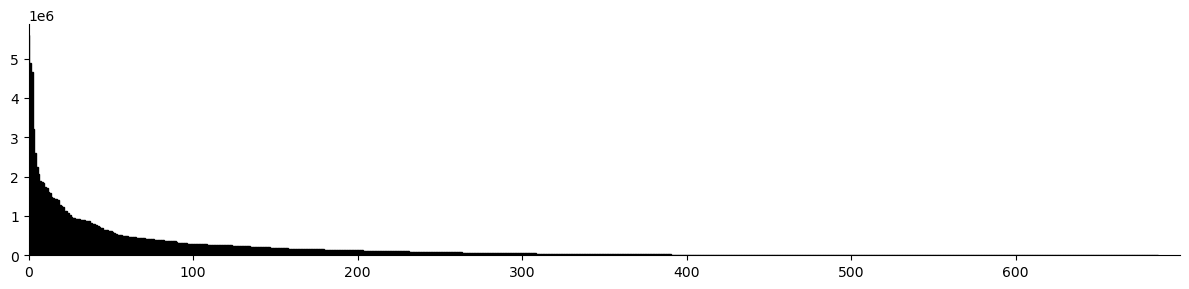

In [27]:
# output total counts distribution
plt.style.use("default")

params = {
     'legend.fontsize': 10,
     'axes.labelsize': 10,
     'axes.titlesize': 20,
     'xtick.labelsize': 10,
     'ytick.labelsize': 10}
plt.rcParams.update(params)

fig = plt.figure(figsize = (12, 3))
ax = plt.axes()
# ax2 = ax.twinx()

# fig, ax = plt.subplots(figsize = [15, 6])

### ax
# plot the bar
ax.bar(np.arange(sorted_total_activity_counts.shape[0]), 
       sorted_total_activity_counts.values.reshape(-1,),
       width=1.0, # this remove the white gaps between bars. 
       facecolor='black', 
       edgecolor = 'black')

# add Residential and French restaurants.
strong_mobility_name = 'Residential'
weak_mobility_name = 'French'
strong_mobility_rank = list(sorted_total_activity_counts.index).index(strong_mobility_name)
strong_mobility_count = sorted_total_activity_counts.loc[strong_mobility_name, 'count']
weak_mobility_rank = list(sorted_total_activity_counts.index).index(weak_mobility_name)
weak_mobility_count = sorted_total_activity_counts.loc[weak_mobility_name, 'count']

# add two examples
ax.bar(strong_mobility_rank, strong_mobility_count, color = 'black')
ax.bar(weak_mobility_rank, weak_mobility_count, color = 'black')

# # annotate the strong and weak mobility tie examples.
# ax.annotate('#' + str(strong_mobility_rank+1) + ' Home ' + "(" + "{:,}".format(int(strong_mobility_count)) + ' visits)', 
#             xy=(strong_mobility_rank, strong_mobility_count), xycoords = 'data',
#             xytext=(strong_mobility_rank+10, strong_mobility_count*1.2), textcoords = 'data', 
#             arrowprops=dict(arrowstyle="->", lw = 1, connectionstyle="arc3"))

# ax.annotate('#' + str(weak_mobility_rank+1) + ' French Restaurant ' + "(" + "{:,}".format(int(weak_mobility_count)) + ' visits)', 
#             xy=(weak_mobility_rank, weak_mobility_count), xycoords = 'data',
#             xytext=(weak_mobility_rank-10, weak_mobility_count*20), textcoords = 'data', 
#             arrowprops=dict(arrowstyle="->", lw = 1, connectionstyle="arc3"))

# update font sizes


# ax.set(xlabel = 'Activity categories', 
#        ylabel = "Counts")

# plot a fitted curve
# x_list = np.arange(sorted_total_activity_counts.shape[0]) + 1
# y_list = sorted_total_activity_counts.values.reshape(-1,)
# fittedParameters = np.polyfit(np.log(x_list), np.log(y_list), deg = 1)
# log_y_pred = np.polyval(fittedParameters, np.log(x_list))
# y_pred = np.exp(log_y_pred)
# ax.plot(x_list[20:], y_pred[20:], '-', linewidth = 3, alpha = 0.9, color = 'black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.spines['right'].set_visible(False)
ax.set_xticks([0, 100, 200, 300, 400, 500, 600])
ax.set_xlim((0,700))

### ax2
# ax2.plot(cumulative_share_list, '-', color = 'black')
# ax2.set(ylabel = "Cumulative Shares")

# # add the 20-80 rule.
# percent_20_rank = int(0.2 * sorted_total_activity_counts.shape[0])
# percent_20_count = cumulative_share_list[percent_20_rank]
# ax2.axvline(x = percent_20_rank, 
#             ymin=0.0, ymax=percent_20_count, 
#             linestyle = '--', color = 'red')
# ax2.scatter(percent_20_rank, percent_20_count, s = 40, color = 'red')

# ax2.annotate('20-80 Rule: ' + 'Top 20% activities accounting for ' + str(np.round(percent_20_count * 100, decimals = 2)) + '% total mobility ties', 
#             xy=(percent_20_rank+2, percent_20_count/1.01), xycoords = 'data',
#             xytext=(percent_20_rank-10, percent_20_count/1.2), textcoords = 'data')
#             arrowprops=dict(arrowstyle="->", lw = 1, connectionstyle="arc3"))

# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig(fig_location + 'activity_counts_total.png')


In [29]:
print(str(strong_mobility_rank+1))
print("{:,}".format(int(strong_mobility_count)))
print(str(weak_mobility_rank+1))
print("{:,}".format(int(weak_mobility_count)))

3
4,653,500
267
65,534


### Plot the cumulative power law and compute the alpha exponent value.
- Using Chapter 8 from Newman book.

In [140]:
# reversed cumulative distribution function
reversed_cumulative_share_list = []
for share in cumulative_share_list:
    reversed_cumulative_share_list.append(1 - share)

reversed_cumulative_share_list

[0.9555212422141572,
 0.9166754563012903,
 0.879679091135535,
 0.8541417249935478,
 0.8333820297774509,
 0.8156349207112681,
 0.7991655556693056,
 0.7842522481264443,
 0.7694063664292844,
 0.75471122892035,
 0.7408193342948705,
 0.7272204928586838,
 0.7143445731976961,
 0.7017952884701637,
 0.6900924560909354,
 0.6785070087620289,
 0.6671007515211143,
 0.6556980003287736,
 0.6445836275942941,
 0.6344701959516237,
 0.6245661970472282,
 0.6148723384510009,
 0.6058335464722009,
 0.5968629674112308,
 0.5883830045941082,
 0.5802582180128898,
 0.572603830257099,
 0.5651083277184217,
 0.5576157588122246,
 0.5502555770281377,
 0.54293916917477,
 0.5357020170997064,
 0.5285451543320048,
 0.5213935784629462,
 0.5142628639804128,
 0.5073052815155467,
 0.5003615801409522,
 0.49350357422571556,
 0.4869062243389145,
 0.48061635729710117,
 0.4743912527761087,
 0.4682213148561446,
 0.4623359233863036,
 0.4567014012197408,
 0.4511431852985548,
 0.4456079296229041,
 0.44045070707578715,
 0.4354059165897

In [141]:
# Compute the alpha exponent.
# sklearn lienar reg
from sklearn.linear_model import LinearRegression
k_min = 1
k_max = 600 #
log_y = np.array(np.log(reversed_cumulative_share_list[k_min:k_max]))
log_x = pd.DataFrame(np.log(np.arange(len(reversed_cumulative_share_list))[k_min:k_max]))
reg = LinearRegression().fit(log_x, log_y)
print(reg.coef_)
print(reg.intercept_)

alpha = -reg.coef_ + 1
print(alpha)

[-1.76977413]
6.015497822642617
[2.76977413]


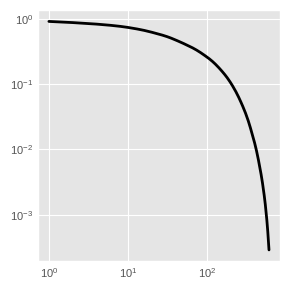

In [166]:
# The log-log plot of the mobility counts and activities.
k_min = 1
k_max = 600

plt.style.use("ggplot")
fig, ax = plt.subplots(figsize = (3, 3))
ax.loglog(np.arange(len(reversed_cumulative_share_list))[k_min:k_max], reversed_cumulative_share_list[k_min:k_max], 
         linewidth = 2,
         color = 'black')
# ax.set_title('Mobility Ties (log-log plot)', fontsize=15)
# ax.set_xlabel('Activities (log)', fontsize=13)
# ax.set_ylabel('Cumulative distribution (log)', fontsize=13)
ax.set_xticks([1, 10, 100])
# ax.set_xticklabels([1, 10, 100], fontsize=13)
ax.set_yticks([0.001, 0.01, 0.1, 1])
# ax.set_yticklabels([0.1, 1], fontsize=13)

# ax.annotate("alpha = " + str(np.round_(alpha[0], decimals = 2)), 
#             xy=(1, 0.0003), xycoords = 'data',
#            fontsize = 15)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
#     label.set_fontname('Arial')
    label.set_fontsize(8)

# ax.set_yticks([0, 0.001, 0.1, 1])
plt.tight_layout()
plt.show()


In [103]:
### Formula from Newman textbook. 
k_min = 100
k_max = 686
cum_value = 0.0
for k_i in np.arange(len(reversed_cumulative_share_list))[k_min:k_max]:
    cum_value += np.log(k_i/(k_min - 0.5))    
N = k_max - k_min + 1
alpha = 1 + N * 1/cum_value
print(alpha)

1.7964623622527935


#### Cumulative mobility network shares - demonstrating the weakness

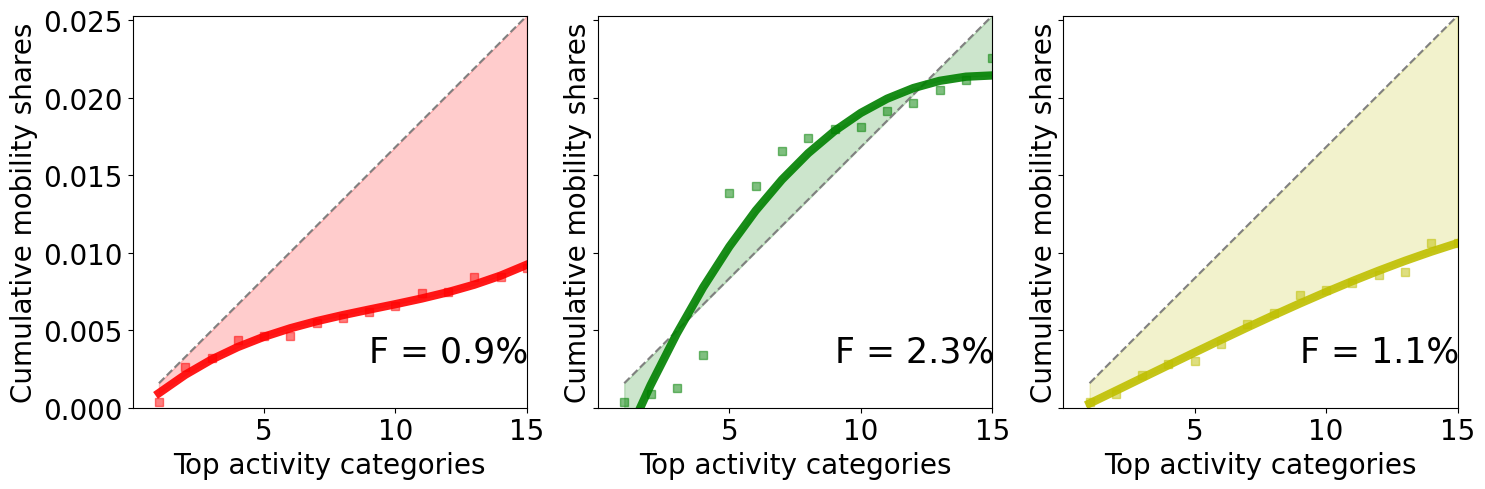

In [31]:
# Create the 1*3 plot to demonstrate the weakness of the predictive mobility ties.
# city = 'chicago'
city = 'boston'
# city = 'miami'

output_list = ['inc_median_household_2018', 'property_value_median_2018', 'rent_median_2018']
title_list = ['Household Income', 'Property Value', 'Monthly Rent']
color_list = ['r', 'g', 'y']

fig, ax = plt.subplots(1, 3, sharey = True, figsize = (15,5))


for output_idx in np.arange(3):
#     print(output_idx)
    output = output_list[output_idx]
    
    ### create the cummulative shares of mobility network counts
    coeff_df_ = lasso_coef[city][output]['lasso (no socio-demographics)']
    
    # sort according to abs values.
    coeff_df_.value = np.abs(coeff_df_.value)
    coeff_df_ = coeff_df_.sort_values('value', ascending = False)
    
    # need to get a plot
    x_list = np.arange(15)
    y_list = []
    cum_counts = 0.0

    for idx in x_list:
        activity_name = coeff_df_.index[idx]
        activity_count = activity_counts_df_dic[city].loc[activity_name, 'count']
        cum_counts += activity_count
        y_list.append(cum_counts/activity_counts_df_dic[city].sum()[0])
        
    #     print(activity_name)

    # coeff_df_

    ### visualization 
    y_max = 15/activity_counts_df_dic[city].shape[0]

    # update font sizes
    params = {
         'legend.fontsize': 20,
         'axes.labelsize': 20,
         'axes.titlesize': 30,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20}
    plt.rcParams.update(params)
    
    # plot the points
    ax[output_idx].plot(x_list, y_list, 's', linewidth = 2.5, alpha = 0.5, color = color_list[output_idx])

    # background 45 degree line
    # subtlty here: you need to lift one unit to create the benchmark.
    benchmark_45degree_values = np.linspace(0.0, y_max, 15) + 1.0/activity_counts_df_dic[city].shape[0]
    ax[output_idx].plot(x_list, benchmark_45degree_values,
            '--', color = 'grey')

    # provide a fit
    fittedParameters = np.polyfit(x_list, y_list, deg = 3)
    y_pred = np.polyval(fittedParameters, x_list)
    ax[output_idx].plot(x_list, y_pred, linewidth = 6, alpha = 0.9, color = color_list[output_idx])

    # fill between
    ax[output_idx].fill_between(x_list, benchmark_45degree_values, y_pred,
                                color = color_list[output_idx],
                                alpha = 0.2)
    
    ax[output_idx].set(xlabel = 'Top activity categories', 
           ylabel = "Cumulative mobility shares",
           ylim = [0.0, benchmark_45degree_values.max()],
           xlim = [-1, 14])

#     ax[output_idx].spines['top'].set_visible(False)
#     ax[output_idx].spines['right'].set_visible(False)
    
    ax[output_idx].annotate("F = " + str(np.round_(y_list[-1] * 100, decimals = 1)) + '%', 
                            xy=(8, 0.003), xycoords = 'data',
                            xytext=(8, 0.003), textcoords = 'data', ha = 'left',
                            size = 25)
    
    ax[output_idx].set_xticks([4, 9, 14])
    ax[output_idx].set_xticklabels([5, 10, 15])
#     ax[output_idx].set_title(title_list[output_idx])

plt.tight_layout()
plt.show()
fig.savefig(fig_location + 'weak_ties_cumulative_counts_' + str(city) + '.png')
    